In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

#creating trip timeframe variables
start_date = '2015-04-10'
end_date = '2015-04-19'

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results (last date in the sqllite is 2017-08-23)
last_12_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").filter(Measurement.date <= "2017-08-23").all()

#loading data into its own dataframe
last_12_df = pd.DataFrame(last_12_prcp)
#converting data type of the date column to date time instead of string
last_12_df.date = pd.to_datetime(last_12_df.date)

#setting index of dataframe to the date column 
last_12_df = last_12_df.set_index('date')

#renaming prcp column name to be more readable
last_12_df.rename(columns={"prcp":"Precipitation"}, inplace=True)

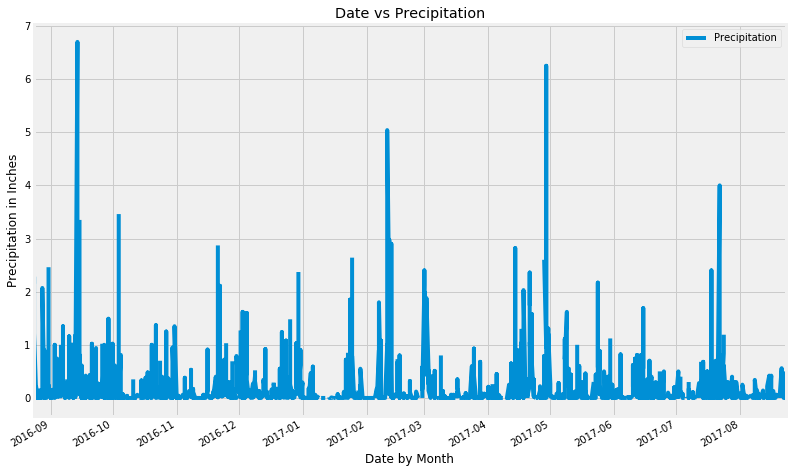

In [11]:
#plotting dataframe into a bar graph which has prcp and date values
last_12_df.plot(figsize = (12,8), use_index = True)

#labels for axes and title
plt.xlabel('Date by Month')
plt.ylabel('Precipitation in Inches')
plt.title('Date vs Precipitation')

plt.show()

In [12]:
#summary statistics for the dataframe
last_12_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
station_num = session.query(Station.id).count()
print(f"There are {station_num} weather stations on Hawaii gathering data.")

There are 9 weather stations on Hawaii gathering data.


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

#displaying information based on station ID
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
results = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

#results are displayed in the order "Station Id, Min Temp, Max Temp, Avg. Temp"
results

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_most_active = session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.station == 'USC00519281', Measurement.date >= "2016-08-24", Measurement.date <= '2017-08-23').all()

df = pd.DataFrame(last_12_most_active)
#setting index of dataframe to the date column 
df = df.set_index('date')

#renaming prcp column name to be more readable
df.rename(columns={"tobs":"Temperature"}, inplace=True)
temp_data = df.Temperature

#displays temperature and date for the station USC00519281
df.head()

,Temperature
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


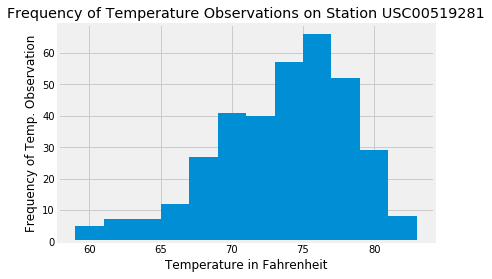

In [17]:
plt.hist(temp_data, bins = 12)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Frequency of Temp. Observation')
plt.title('Frequency of Temperature Observations on Station USC00519281')
plt.show()

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function output for my trip during the times 
print(f"{calc_temps(start_date, end_date)} which is the Minimum Temp., Maximum Temp., and Avg. Temp. \n during my trip starting on {start_date}, and ending on {end_date}. ")

[(64.0, 72.734375, 78.0)] which is the Minimum Temp., Maximum Temp., and Avg. Temp. 
 during my trip starting on 2015-04-10, and ending on 2015-04-19. 


In [19]:
#updated date variables for if I took my trip in 2017 instead of 2015
test_start = '2017-04-10'
test_end = '2017-04-19'

# function output for my trip during the times 
print(f"{calc_temps(test_start, test_end)} which is the Minimum Temp., Maximum Temp., and Avg. Temp. \n during my theoretical trip starting on {test_start}, and ending on {test_end}. ")

[(67.0, 73.49230769230769, 83.0)] which is the Minimum Temp., Maximum Temp., and Avg. Temp. 
 during my theoretical trip starting on 2017-04-10, and ending on 2017-04-19. 


In [20]:
vacation_info = calc_temps(start_date,end_date)
from operator import itemgetter
avg_temp = itemgetter(0)(vacation_info)[2]
min_temp = itemgetter(0)(vacation_info)[0]
max_temp = itemgetter(0)(vacation_info)[1]
print(f"Min Temp: {min_temp}, Max Temp: {max_temp}, Average Temp: {avg_temp}")

Min Temp: 64.0, Max Temp: 72.734375, Average Temp: 78.0


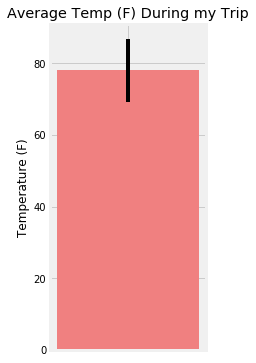

In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2.5,6))                                                
plt.bar(78,avg_temp, yerr = (max_temp-min_temp), color = 'lightcoral', tick_label = '')
plt.ylabel('Temperature (F)')
plt.title('Average Temp (F) During my Trip')
plt.show()

In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
prcp_by_station = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
filter(Measurement.station == Station.station, Measurement.date >= test_start, Measurement.date <= test_end).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

#outpute is messy but the order of outputs is station id, station name, latitude, longitude, elevation, precipitation sum
prcp_by_station

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  7.38),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  6.979999999999999),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2.48),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.86),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.8099999999999999),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.31000000000000005),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]

## Optional Challenge Assignment

In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
#variables for start and end dates of the trip which convert any data into the format y-m-d
start_time = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_time = dt.datetime.strptime(end_date, '%Y-%m-%d')

#empty lists for appending in for loop
date_range = []
normals =[]

#while loop to create output list of tuples 
while (start_time <= end_time):
    date_range.append(dt.datetime.strftime(start_time,'%Y-%m-%d'))
    dates = dt.datetime.strftime(start_time,'%m-%d')
    normals.append(list(np.ravel(daily_normals(dates))))
    start_time = start_time + dt.timedelta(days = 1)

normals

[[64.0, 71.40350877192982, 79.0],
 [65.0, 72.49180327868852, 82.0],
 [65.0, 72.22413793103448, 80.0],
 [64.0, 71.52542372881356, 79.0],
 [65.0, 72.75, 81.0],
 [61.0, 71.79310344827586, 79.0],
 [62.0, 71.55357142857143, 81.0],
 [65.0, 71.93103448275862, 77.0],
 [67.0, 72.49152542372882, 77.0],
 [65.0, 72.42105263157895, 83.0]]

In [25]:
#creating dataframe of new values with min, max, and avg temp values for each date
normals_df = pd.DataFrame(normals, columns=['Min_Temp', 'Avg_Temp', 'Max_Temp'])
normals_df['Date'] = date_range
normals_df = normals_df.set_index("Date")
normals_df

,Min_Temp,Avg_Temp,Max_Temp
Date,,,
2015-04-10,64.0,71.403509,79.0
2015-04-11,65.0,72.491803,82.0
2015-04-12,65.0,72.224138,80.0
2015-04-13,64.0,71.525424,79.0
2015-04-14,65.0,72.750000,81.0
2015-04-15,61.0,71.793103,79.0
2015-04-16,62.0,71.553571,81.0
2015-04-17,65.0,71.931034,77.0
2015-04-18,67.0,72.491525,77.0


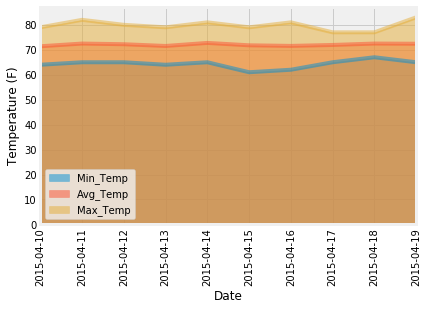

In [26]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)
plt.xticks(rotation=90)
plt.ylabel('Temperature (F)')
plt.xlabel('Date')
plt.show()